<a href="https://colab.research.google.com/github/momijizen/boilerplate-sea-level-predictor/blob/main/sea_level_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sea-Level Change Prediction 

We will analyze the global average sea-level change dataset since 1880 and use the data to forecast sea-level change through the year 2050.

We import the dataset used from https://datahub.io/core/sea-level-rise

Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
!pip -q install datapackage
from datapackage import Package

Download Dataset

In [ ]:
package = Package('https://datahub.io/core/sea-level-rise/datapackage.json')
# print list of all resources:
print(package.resource_names)

['validation_report', 'csiro_alt_gmsl_mo_2015_csv', 'csiro_alt_gmsl_yr_2015_csv', 'csiro_recons_gmsl_mo_2015_csv', 'csiro_recons_gmsl_yr_2015_csv', 'epa-sea-level_csv', 'csiro_alt_gmsl_mo_2015_json', 'csiro_alt_gmsl_yr_2015_json', 'csiro_recons_gmsl_mo_2015_json', 'csiro_recons_gmsl_yr_2015_json', 'epa-sea-level_json', 'sea-level-rise_zip', 'csiro_alt_gmsl_mo_2015', 'csiro_alt_gmsl_yr_2015', 'csiro_recons_gmsl_mo_2015', 'csiro_recons_gmsl_yr_2015', 'epa-sea-level']


 Global Average Absolute Sea Level Change, 1880-2014

In [ ]:
# to load only epa-sea-level_csv dataset
resources = package.resources
resource = resources[5]
df = pd.read_csv(resource.descriptor['path'])
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN
1,1881-03-15,0.220472,-0.732283,1.173228,NaN
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN
4,1884-03-15,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
130,2010-03-15,8.901575,8.618110,9.185039,8.122973
131,2011-03-15,8.964567,8.661417,9.267717,8.053065
132,2012-03-15,9.326772,8.992126,9.661417,8.457058
133,2013-03-15,8.980315,8.622047,9.338583,8.546648


Prepare Data

In [ ]:
df = df[['Year','CSIRO Adjusted Sea Level']]

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df['Year'] = df['Year'].str.slice(0,4)
df = df.astype({'Year': 'int32'})
df.set_index('Year', inplace=True)

Create scatter plot

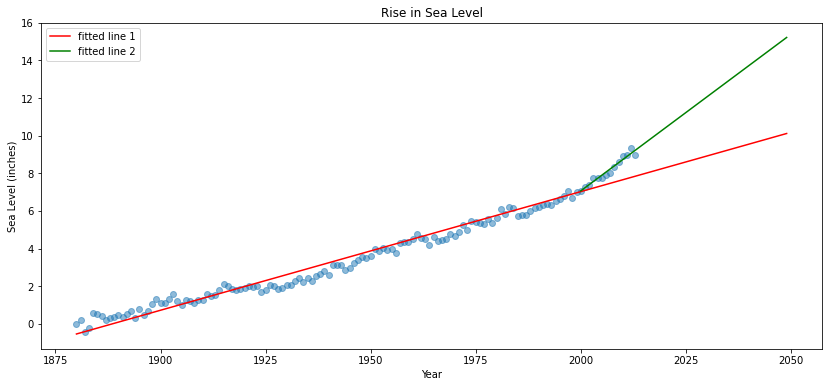

In [ ]:
# Create scatter plot
plt.figure(figsize=(14,6))
plt.scatter(df.index, df['CSIRO Adjusted Sea Level'], alpha=0.5 )

# Create first line of best fit
res = linregress(df.index, df['CSIRO Adjusted Sea Level'])
year_1880_2050 = np.concatenate((df.index, np.arange(2014,2050)), axis=0)
plt.plot(year_1880_2050 , res.intercept + res.slope*year_1880_2050, 'r', label='fitted line 1')

# Create second line of best fit
res2 = linregress(df.loc['200':].index, df.loc['200':]['CSIRO Adjusted Sea Level'])
year_2000_2050 = np.concatenate((df.loc['200':].index, np.arange(2014,2050)), axis=0)
plt.plot(year_2000_2050 , res2.intercept + res2.slope*year_2000_2050, 'g', label='fitted line 2')

 # Add labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()
